### Importing data from Yahoo Finance

In [9]:
import datetime
import yahoofinancials as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import stock data

In [11]:
from yahoofinancials import YahooFinancials

In [41]:
ticker = ['AMZN','GOOG','MSFT','TSLA','SPY']

In [42]:
yahoo_financials = YahooFinancials(ticker)

In [43]:
df = yahoo_financials.get_historical_price_data("2018-04-24", "2021-11-24",
                                                "daily")

In [44]:
stock_prices = {}
for stock in ticker:
    stock_prices[stock]= pd.DataFrame(df[stock]['prices'])
    

In [45]:
df_mat = pd.DataFrame()
for stock in stock_prices.keys():
    df_mat[stock]= stock_prices[stock]["adjclose"]

In [46]:
#!pip install numpy==1.17

In [47]:
df_mat.pct_change().describe()

,AMZN,GOOG,MSFT,TSLA,SPY
count,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.001186,0.001339,0.001653,0.004167,0.000795
std,0.019683,0.018386,0.018771,0.041890,0.013216
min,-0.079221,-0.111008,-0.147390,-0.210628,-0.109424
25%,-0.008104,-0.006368,-0.006427,-0.017277,-0.003544
50%,0.001452,0.001549,0.001643,0.002430,0.001309
75%,0.010874,0.010155,0.010714,0.022489,0.006470
max,0.094452,0.104485,0.142169,0.198949,0.090603


In [48]:
df_mat.pct_change().corr()

,AMZN,GOOG,MSFT,TSLA,SPY
AMZN,1.000000,0.668518,0.717225,0.368569,0.624630
GOOG,0.668518,1.000000,0.781636,0.356461,0.771736
MSFT,0.717225,0.781636,1.000000,0.426719,0.840678
TSLA,0.368569,0.356461,0.426719,1.000000,0.424809
SPY,0.624630,0.771736,0.840678,0.424809,1.000000


In [75]:
import numpy as np

## Create technical indicators

### MACD

In [69]:
def macd(returns_array, fast=12, slow=26, signal=9):
    df = pd.DataFrame()
    df["adjclose"]=returns_array
    
    df["ma_fast"] = df["adjclose"].ewm(span=fast, min_periods=fast).mean()
    df["ma_slow"] = df["adjclose"].ewm(span=slow, min_periods=slow).mean()
    df["macd"] = df["ma_fast"] - df["ma_slow"]
    df["signal"] = df["macd"].ewm(span=signal, min_periods=signal).mean()
    return df.loc[:, ["macd", "signal"]]

In [70]:
macd_aws = macd(df_mat["AMZN"].values)

<AxesSubplot:>

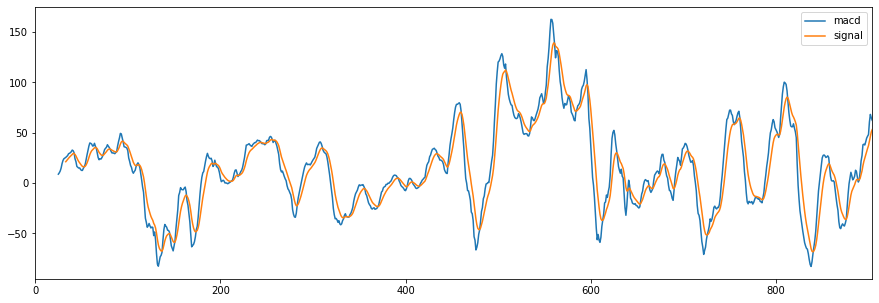

In [78]:
macd_aws.plot(figsize = (15,5))